In [19]:
import pandas as pd

df = pd.read_csv('lymes.csv')

In [20]:
df

,Year,Count
0,2009,144
1,2010,143
2,2011,266
3,2012,338
4,2013,682
5,2014,522
6,2015,917
7,2016,992
8,2017,2025
9,2018,1487


In [21]:
df[df['Year'] > 2017]

,Year,Count
9,2018,1487
10,2019,2634
11,2020,1615
12,2021,3147


In [22]:
df[df['Count'] < 500]

,Year,Count
0,2009,144
1,2010,143
2,2011,266
3,2012,338


In [34]:
# df[5] # doesn't work, instead use:

In [24]:
df.iloc[5]

Year     2014
Count     522
Name: 5, dtype: int64

In [25]:
df.loc[5]

Year     2014
Count     522
Name: 5, dtype: int64

In [33]:
# Methods available on a dataframe

# for i,thing in enumerate(dir(df)):
#     if not thing.startswith('_'):
#         print(thing)

In [27]:
df.where(df['Count'] < 500)

,Year,Count
0,2009.0,144.0
1,2010.0,143.0
2,2011.0,266.0
3,2012.0,338.0
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [5]:
from scipy.integrate import quad, dblquad, tplquad, nquad
from sympy.abc import x, y
from sympy import *

# `dblquad(func, a, b, gfun, hfun)`

Compute a double integral

Return the double (definite) integral of ``func(y, x)`` from ``x = a..b``
and ``y = gfun(x)..hfun(x)``

Parameters
----------
**func: callable**
    A Python function or method of at least two variables: y must be the
    first argument and x the second argument

**a, b: float**
    The limits of integration: $a < x < b$

**gfun: callable or float**
    The lower boundary curve in y which is a function returning a constant boundary curve
    
**hfun: callable or float**
    The upper boundary curve in y

# `tplquad(func, a, b, gfun, hfun, qfun, rfun)`
Compute a triple (definite) integral.

Return the triple integral of ``func(z, y, x)`` from ``x = a..b``,
``y = gfun(x)..hfun(x)``, and ``z = qfun(x,y)..rfun(x,y)``.

Parameters
----------
func : function
    A Python function or method of at least three variables in the
    order (z, y, x).
    
a, b : float
    The limits of integration in x: `a` < `b`

gfun : function or float
    The lower boundary curve in y which is a function taking a single
    floating point argument (x) and returning a floating point result
    or a float indicating a constant boundary curve.

hfun : function or float
    The upper boundary curve in y (same requirements as `gfun`).

qfun : function or float
    The lower boundary surface in z.  It must be a function that takes
    two floats in the order (x, y) and returns a float or a float
    indicating a constant boundary surface.

rfun : function or float
    The upper boundary surface in z. (Same requirements as `qfun`.)

```python
>>> f = lambda x, y, z: np.exp(-(x ** 2 + y ** 2 + z ** 2))
>>> integrate.tplquad(f, -np.inf, np.inf, -np.inf, np.inf, -np.inf, np.inf)
    (5.568327996830833, 4.4619078828029765e-08)
```

# Volume of circle $|x|\leq 1$

In [6]:
import numpy as np

f = lambda rho, phi, theta: rho**2 * sin(phi)
tplquad(f, 0, 2*np.pi, 0, np.pi, 0, 1)

(4.18879020478639, 4.650491330678174e-14)

In [7]:
nquad(f, [[0, 1], [0, np.pi], [0, 2*np.pi]])

(4.18879020478639, 4.650491330678174e-14)

In [8]:
4*np.pi/3

4.1887902047863905

In [11]:
from itertools import product
from numpy import linspace

mesh_size = 200

pts = product(linspace(-1,1,mesh_size), repeat=3)

tally = 0
for x, y, z in pts:
    if x**2 + y**2 + z**2 < 1:
        tally += 1
(tally / mesh_size**3)*8 # ratio of points in sphere to total points times 8

4.125288

In [28]:
from numpy.random import random
import numpy as np
mesh_size = 9999999
pts = random((mesh_size, 3))*2 - 1
tally = 0
for x, y, z in pts:
    if x**2 + y**2 + z**2 < 1:
        tally += 1
(tally / mesh_size)*8

# takes 47 seconds on my machine

4.189646018964602

In [37]:
import os
import time


os.system('gcc test.c')
time.sleep(2)
start = time.time()
os.system('./a.out')
end = time.time()

end - start # time in seconds

4.188387


0.45327019691467285

In [2]:
import subprocess

def vol(dimension):
    try:
        result = subprocess.run(['./a.out', str(dimension)], check=True, text=True, capture_output=True)
        return result.stdout
    except subprocess.CalledProcessError as e:
        return f"An error occurred: {e}"

In [5]:
for i in range(10):
    print(vol(i))

An error occurred: Command '['./a.out', '0']' returned non-zero exit status 1.
Volume of a 1-dimensional ball: 2.000000
Execution Time: 0.15 seconds

Volume of a 2-dimensional ball: 3.141433
Execution Time: 0.31 seconds

Volume of a 3-dimensional ball: 4.189678
Execution Time: 0.49 seconds

Volume of a 4-dimensional ball: 4.936846
Execution Time: 0.52 seconds

Volume of a 5-dimensional ball: 5.269018
Execution Time: 0.60 seconds

Volume of a 6-dimensional ball: 5.163270
Execution Time: 0.72 seconds

Volume of a 7-dimensional ball: 4.719053
Execution Time: 0.79 seconds

Volume of a 8-dimensional ball: 4.062464
Execution Time: 0.88 seconds

Volume of a 9-dimensional ball: 3.292621
Execution Time: 1.02 seconds



Text(0, 0.5, 'Volume')

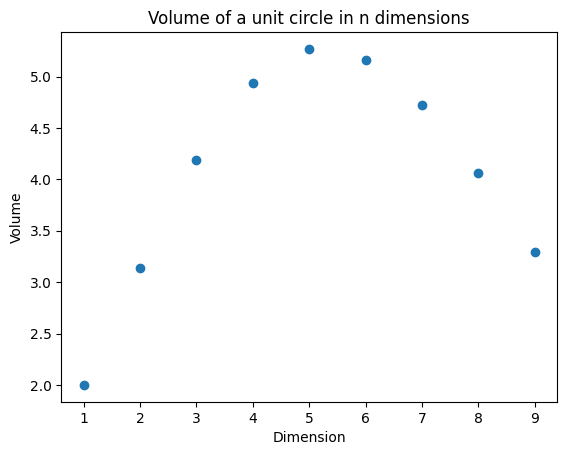

In [15]:
ys = [2.000000, 3.141433, 4.189678, 4.936846, 5.269018,5.163270, 4.719053, 4.062464, 3.292621]
xs = list(range(1,10))
from matplotlib.pyplot import scatter, title, xlabel, ylabel, axhline
from math import pi
scatter(xs, ys)
title("Volume of a unit circle in n dimensions")
xlabel("Dimension")
ylabel("Volume")

In [13]:
# Another approach using numpy

import numpy as np

mesh_size = 100

x, y, z = np.meshgrid(np.linspace(-1, 1, mesh_size),
                      np.linspace(-1, 1, mesh_size),
                      np.linspace(-1, 1, mesh_size))

distances = np.sqrt(x**2 + y**2 + z**2)

inside_sphere = np.count_nonzero(distances < 1)

ratio = inside_sphere / (mesh_size**3)

volume_of_sphere = ratio * 8

print(volume_of_sphere)

In [37]:
from sympy import *
from scipy.integrate import dblquad

# Example

Consider a triangle with vertices $(0,0), (0,3), (3,0)$ and density $\rho(x,y) = xy$ kg/m^2

**Q: Find the total mass $M$**

In [38]:
# Find the total mass

M = dblquad(lambda x,y: x*y, 0, 3, lambda x: 0, lambda x: 3-x)

M, 27/8

((3.375000000000001, 3.7470027081099046e-14), 3.375)

$$m = \iint_R \, dm = \iint_R \rho (x,y) dA = \int_{x=0}^{x=3} \int_{y=0}^{y=3-x} xy \, dy \, dx = \int_{x=0}^{x=3} \left[ \left. x \dfrac{y^2}{2} \right|_{y=0}^{y=3} \right] \, dx = \int_{x=0}^{x=3} \dfrac{1}{2} x (3 - x)^2 dx = \left.\left[ \dfrac{9x^2}{4} - x^3 + \dfrac{x^4}{8} \right]\right|_{x=0}^{x=3} = \dfrac{27}{8}. \nonumber $$

**Q: Find the moments $M_x$ and $M_y$**

In [41]:
# Find the moments about the axes

Mx = dblquad(lambda x,y: y*(x*y), 0, 3, lambda x: 0, lambda x: 3-x)
My = dblquad(lambda x,y: x*(x*y), 0, 3, lambda x: 0, lambda x: 3-x)

Mx, My, 81/20

((4.05, 4.496403249731884e-14),
 (4.050000000000001, 4.4964032497318846e-14),
 4.05)

$$M_x = \iint_R y\rho (x,y) \,dA = \int_{x=0}^{x=3} \int_{y=0}^{y=3-x} x y^2 \, dy \, dx = \dfrac{81}{20}, \nonumber $$
$$M_y = \iint_R x\rho (x,y) \,dA = \int_{x=0}^{x=3} \int_{y=0}^{y=3-x} x^2 y \, dy \, dx = \dfrac{81}{20}, \nonumber $$

In [7]:
import requests
req = requests.get(r'https://math.libretexts.org/Courses/Monroe_Community_College/MTH_212_Calculus_III/Chapter_14%3A_Multiple_Integration/14.6%3A_Calculating_Centers_of_Mass_and_Moments_of_Inertia')

from bs4 import BeautifulSoup
soup = BeautifulSoup(req.text, 'html.parser')

In [33]:
TEX = []
starts = soup.text.split('\[')
for tex in starts:
    TEX.append(tex.split('\]')[0])
TEX = TEX[1:]
    # if 'M_{yz}' in tex:
        # print(tex.split('\]')[0])

In [35]:
with open('moments.md', 'w') as f:
    f.write('# Moments of Inertia\n')
    for tex in TEX:
        f.write('$$'+tex+'$$'+ '\n')


In [8]:
# print(soup.text)

$$\bar{x} = \dfrac{M_y}{m}  \nonumber $$
$$\bar{y} = \dfrac{M_x}{m}. \nonumber $$
$$\rho(x,y) = \lim_{\Delta A \rightarrow 0} \dfrac{\Delta m}{\Delta A} \nonumber $$
$$m = \iint_R \, dm = \iint_R \rho (x,y) dA = \int_{x=0}^{x=3} \int_{y=0}^{y=3-x} xy \, dy \, dx = \int_{x=0}^{x=3} \left[ \left. x \dfrac{y^2}{2} \right|_{y=0}^{y=3} \right] \, dx = \int_{x=0}^{x=3} \dfrac{1}{2} x (3 - x)^2 dx = \left.\left[ \dfrac{9x^2}{4} - x^3 + \dfrac{x^4}{8} \right]\right|_{x=0}^{x=3} = \dfrac{27}{8}. \nonumber $$
$$M_x = \lim_{k,l \rightarrow \infty} \sum_{i=1}^k \sum_{j=1}^l (y_{ij}^*)m_{ij} = \lim_{k,l \rightarrow \infty} \sum_{i=1}^k \sum_{j=1}^l (y_{ij}^*) \rho(x_{ij}^*,y_{ij}^*) \,\Delta A = \iint_R y\rho (x,y) \,dA \nonumber $$
$$M_y = \lim_{k,l \rightarrow \infty} \sum_{i=1}^k \sum_{j=1}^l (x_{ij}^*)m_{ij} = \lim_{k,l \rightarrow \infty} \sum_{i=1}^k \sum_{j=1}^l (x_{ij}^*) \rho(x_{ij}^*,y_{ij}^*) \,\Delta A = \iint_R x\rho (x,y) \,dA \nonumber $$
$$M_x = \iint_R y\rho (x,y) \,dA = \int_{x=0}^{x=3} \int_{y=0}^{y=3-x} x y^2 \, dy \, dx = \dfrac{81}{20}, \nonumber $$
$$M_y = \iint_R x\rho (x,y) \,dA = \int_{x=0}^{x=3} \int_{y=0}^{y=3-x} x^2 y \, dy \, dx = \dfrac{81}{20}, \nonumber $$
$$\bar{x} = \dfrac{M_y}{m} = \dfrac{\iint_R x\rho (x,y) \,dA}{\iint_R \rho (x,y)\,dA}  \nonumber $$
$$\bar{y} = \dfrac{M_x}{m} = \dfrac{\iint_R y\rho (x,y) \,dA}{\iint_R \rho (x,y)\,dA} \nonumber $$
$$\bar{x} = \dfrac{M_y}{m} = \dfrac{\iint_R x\rho (x,y) \,dA}{\iint_R \rho (x,y)\,dA} = \dfrac{81/20}{27/8} = \dfrac{6}{5}, \nonumber $$
$$\bar{y} = \dfrac{M_x}{m} = \dfrac{\iint_R y\rho (x,y) \,dA}{\iint_R \rho (x,y)\,dA} = \dfrac{81/20}{27/8} = \dfrac{6}{5}. \nonumber $$
$$x_c = \dfrac{M_y}{m} = \dfrac{\iint_R x \, dA}{\iint_R \,dA} = \dfrac{9/2}{9/2} = 1, \nonumber $$
$$y_c = \dfrac{M_x}{m} = \dfrac{\iint_R y \, dA}{\iint_R \,dA} = \dfrac{9/2}{9/2} = 1. \nonumber $$
$$x_c = \dfrac{M_y}{m} = \dfrac{\iint_R x \, dA}{\iint_R \,dA} \, \text{and} \, y_c = \dfrac{M_x}{m} = \dfrac{\iint_R y \, dA}{\iint_R \,dA}. \nonumber $$

### $x^2 + y^2 = r^2$

### $r = \rho \sin \phi$

### $x^2 + y^2 = \rho^2 \sin^2 \phi$ ...

In [18]:
from sympy import *
from sympy.abc import x, y, z, rho, phi, theta

expr = x**2 + y**2
expr = expr.subs(x, rho*sin(phi)*cos(theta))
expr = expr.subs(y, rho*sin(phi)*sin(theta))
simplify(expr)

rho**2*sin(phi)**2

# Order of bounds in scipy.integrate.tplquad

In [45]:
from scipy.integrate import tplquad
import numpy as np

In [53]:
x = lambda r,phi,theta: r*sin(phi)*cos(theta)
y = lambda r,phi,theta: r*sin(phi)*sin(theta)
z = lambda r,phi,theta: r*cos(phi)

tplquad(lambda r,phi,theta: (r**2*sin(phi)) * (r**2*sin(phi)**2), 0, np.pi*2, lambda r: 0, lambda r: np.pi, lambda r,phi: 0, lambda r,phi: 1)

# the order tpl quad wants it is the first bound is for the last input to func.

(1.6755160819145567, 1.9473456134560817e-14)